In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing data from csv and getting info about data

In [3]:
df =pd.read_csv("C:/Users/LENOVO/OneDrive/Desktop/Unified Mentor Intership/netflix1.csv")
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [11]:
df.shape

(8790, 10)

In [16]:
df.isnull().sum().sum()

0

In [17]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [10]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

In [23]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,9,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",9,2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",9,2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",9,2021
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",9,2021


#Explotary Data Analysis(EDA)

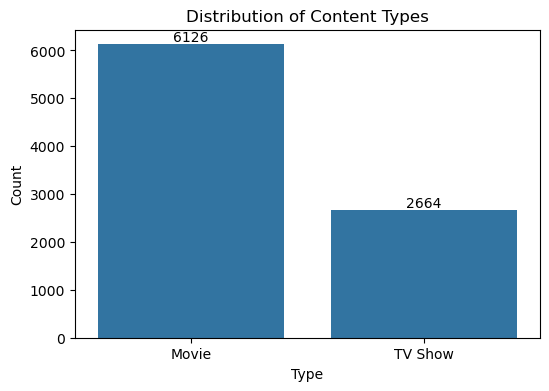

In [28]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='type')
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
ax.bar_label(ax.containers[0])
plt.show()


Text(0.5, 0.98, 'Total Content on Netflix')

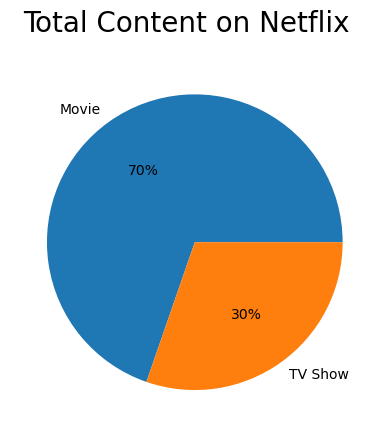

In [30]:
plt.pie(freq, labels=['Movie', 'TV Show'], autopct='%.0f%%')
plt.suptitle('Total Content on Netflix', fontsize=20)

Content Type Distribution: There are significantly more Movies than TV Shows in the dataset.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10764\417394241.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(countries), palette='viridis')


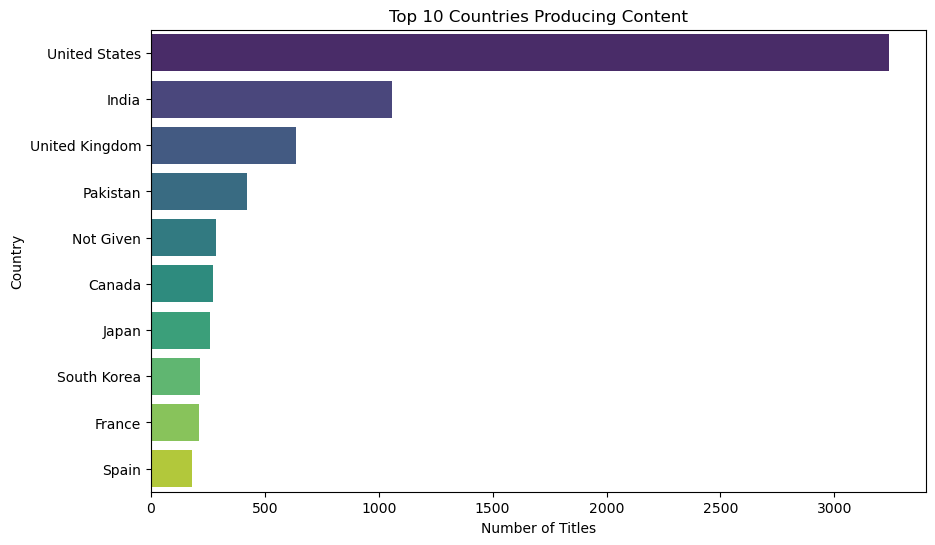

In [22]:
# Since 'country' can have multiple countries separated by commas
from collections import Counter
import itertools

countries = df['country'].dropna().apply(lambda x: [country.strip() for country in x.split(',')])
country_counts = Counter(itertools.chain.from_iterable(countries))
top_countries = country_counts.most_common(10)

# Prepare data for plotting
countries, counts = zip(*top_countries)

plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(countries), palette='viridis')
plt.title('Top 10 Countries Producing Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


Leading Production Countries: The United States is the leading country producing content, followed by the UK and India.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10764\2468613942.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='coolwarm')


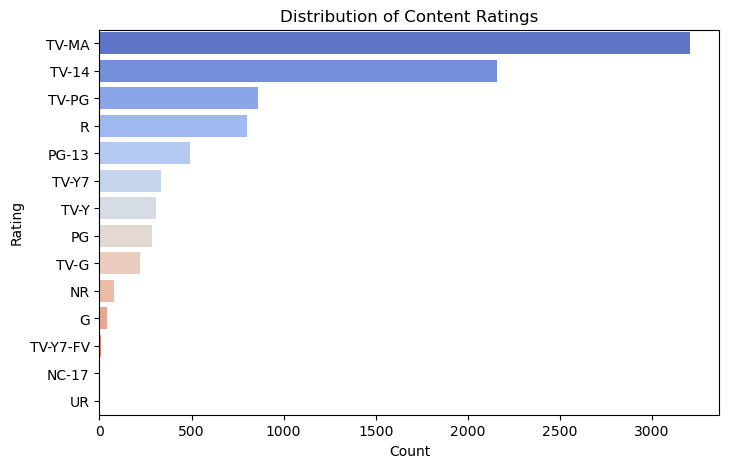

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Content Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


Popular Ratings: Most content falls under the Tv-MA and TV-14 ratings, catering to teenage and adult audiences.

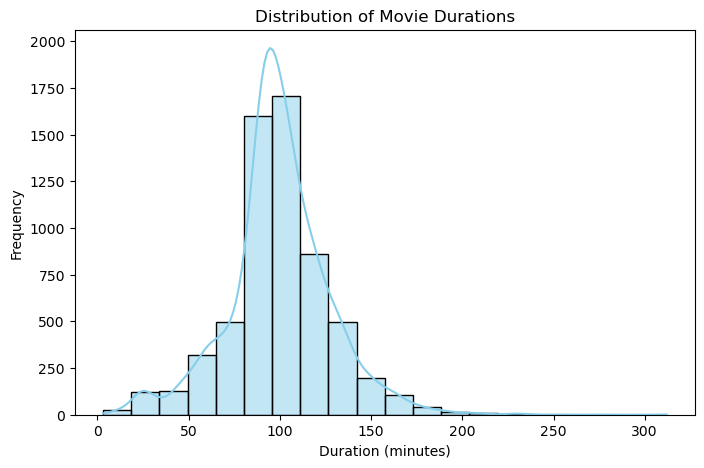

In [32]:
movie_durations = df[df['type'] == 'Movie']['duration_int']

plt.figure(figsize=(8,5))
sns.histplot(movie_durations, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


Duration Trends: Movies typically range between 80-120 minutes, while TV Shows mostly have 1-3 seasons.

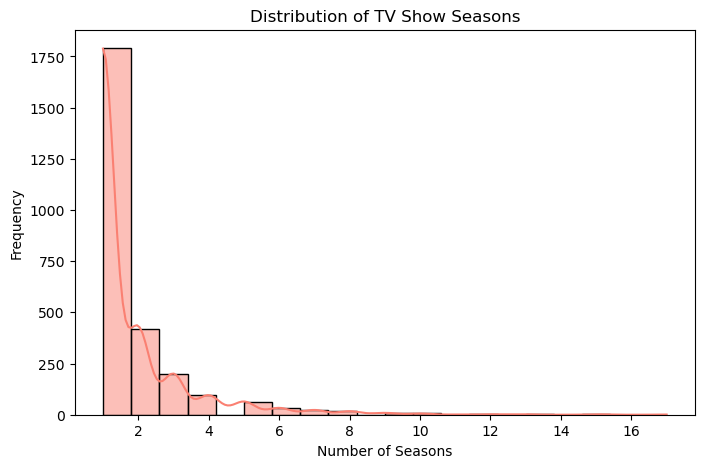

In [33]:
tv_durations = df[df['type'] == 'TV Show']['duration_int']

plt.figure(figsize=(8,5))
sns.histplot(tv_durations, bins=20, kde=True, color='salmon')
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
plt.show()


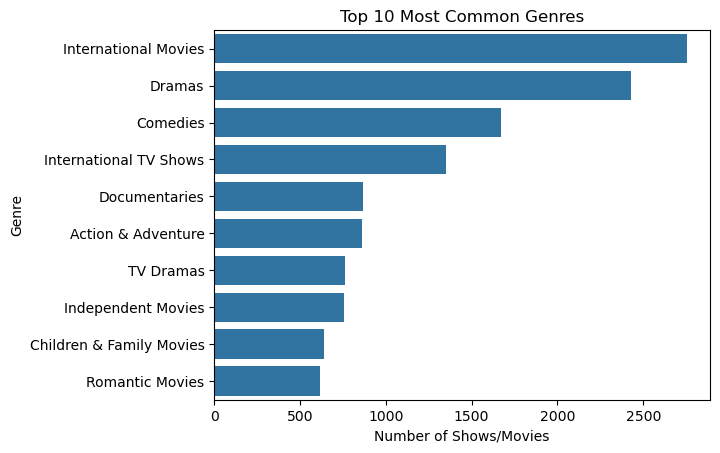

In [4]:
# Split genres and explode
df['listed_in'] = df['listed_in'].str.split(', ')
genre_counts = df.explode('listed_in')['listed_in'].value_counts().head(10)

sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 10 Most Common Genres')
plt.xlabel('Number of Shows/Movies')
plt.ylabel('Genre')
plt.show()


Popular Genres: Drama, Comedy, and International TV Shows are among the top genres, reflecting diverse audience preferences.

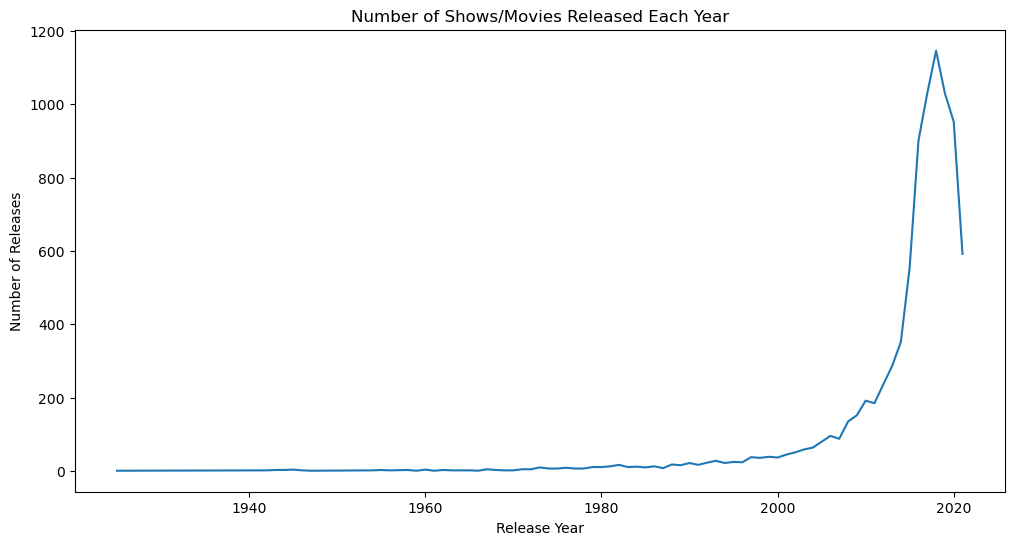

In [5]:
release_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=release_counts.index, y=release_counts.values)
plt.title('Number of Shows/Movies Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.show()


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8780\3425890404.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['duration_num'] = df['duration'].str.extract('(\d+)').astype(int)


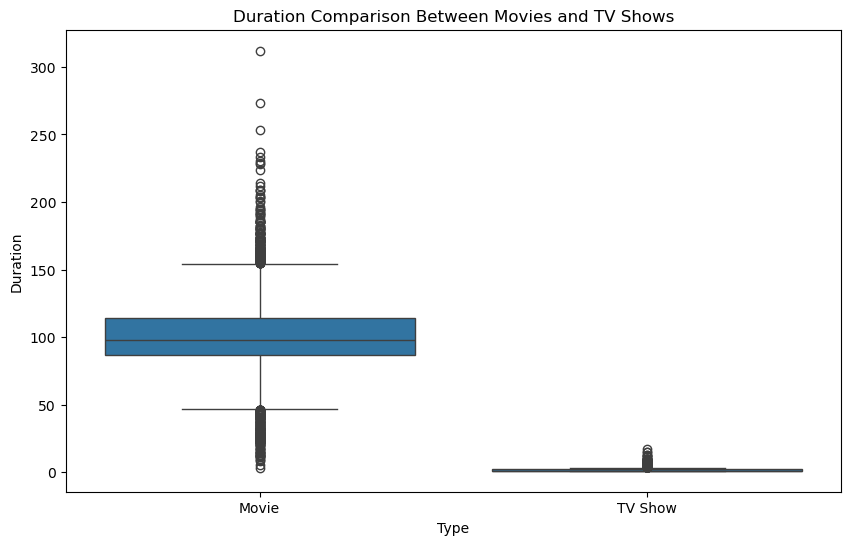

In [7]:
# Extract duration in minutes or seasons
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(int)

plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='duration_num', data=df)
plt.title('Duration Comparison Between Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Duration')
plt.show()


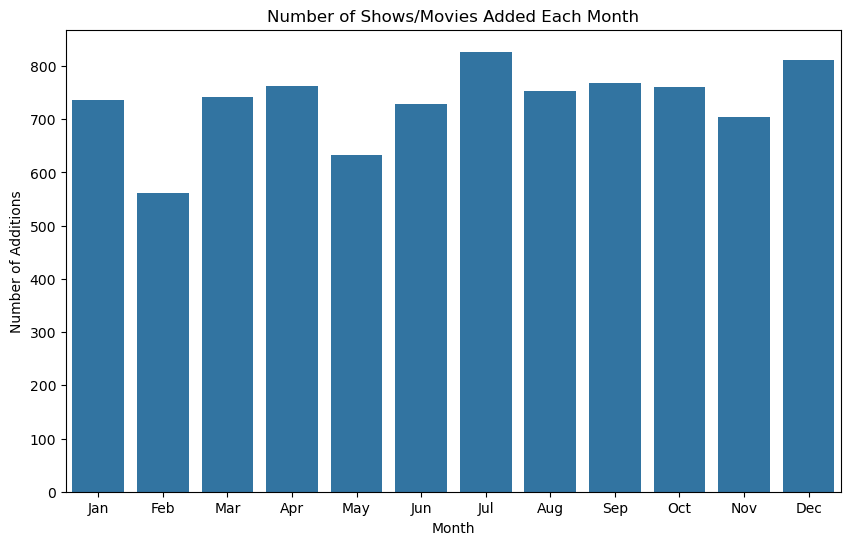

In [12]:
df['month_added'] = df['date_added'].dt.month
month_counts = df['month_added'].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.title('Number of Shows/Movies Added Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Additions')
plt.xticks(ticks=range(0,12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


Growth Over Time: There's a steady increase in the number of titles added each year, indicating platform growth.